In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#SECTION 2
#step 1: load the datasets
diabetes_data = pd.read_csv('diabetes.csv')

In [3]:
# Display the first few rows of the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset Description
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#For easy
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Data Pre-processing
## Handling Missing Values
diabetes_data.replace([np.inf, -np.inf], np.nan, inplace=True)

diabetes_data.dropna(inplace=True)

In [9]:
# Checking for outliers using IQR method
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
#Outliers treatment using IQR method
Q1 = diabetes_data.quantile(0.25)
Q3 = diabetes_data.quantile(0.75)
IQR = Q3 - Q1
diabetes_data = diabetes_data[~((diabetes_data < (Q1 - 1.5 * IQR)) | (diabetes_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [36]:
from sklearn.preprocessing import LabelEncoder

# Your existing code
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col + '_LabelEncoded'] = label_encoder.fit_transform(X[col])

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col + '_LabelEncoded'] = label_encoder.fit_transform(X[col])

# Drop original categorical columns
X.drop(categorical_cols, axis=1, inplace=True)

# Apply one-hot encoding to categorical columns (alternative approach)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display encoded dataset
print("Encoded Dataset:")
print(X_encoded.head())


Encoded Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
#Standarization using StandardScaler
scaler = MinMaxScaler()
diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

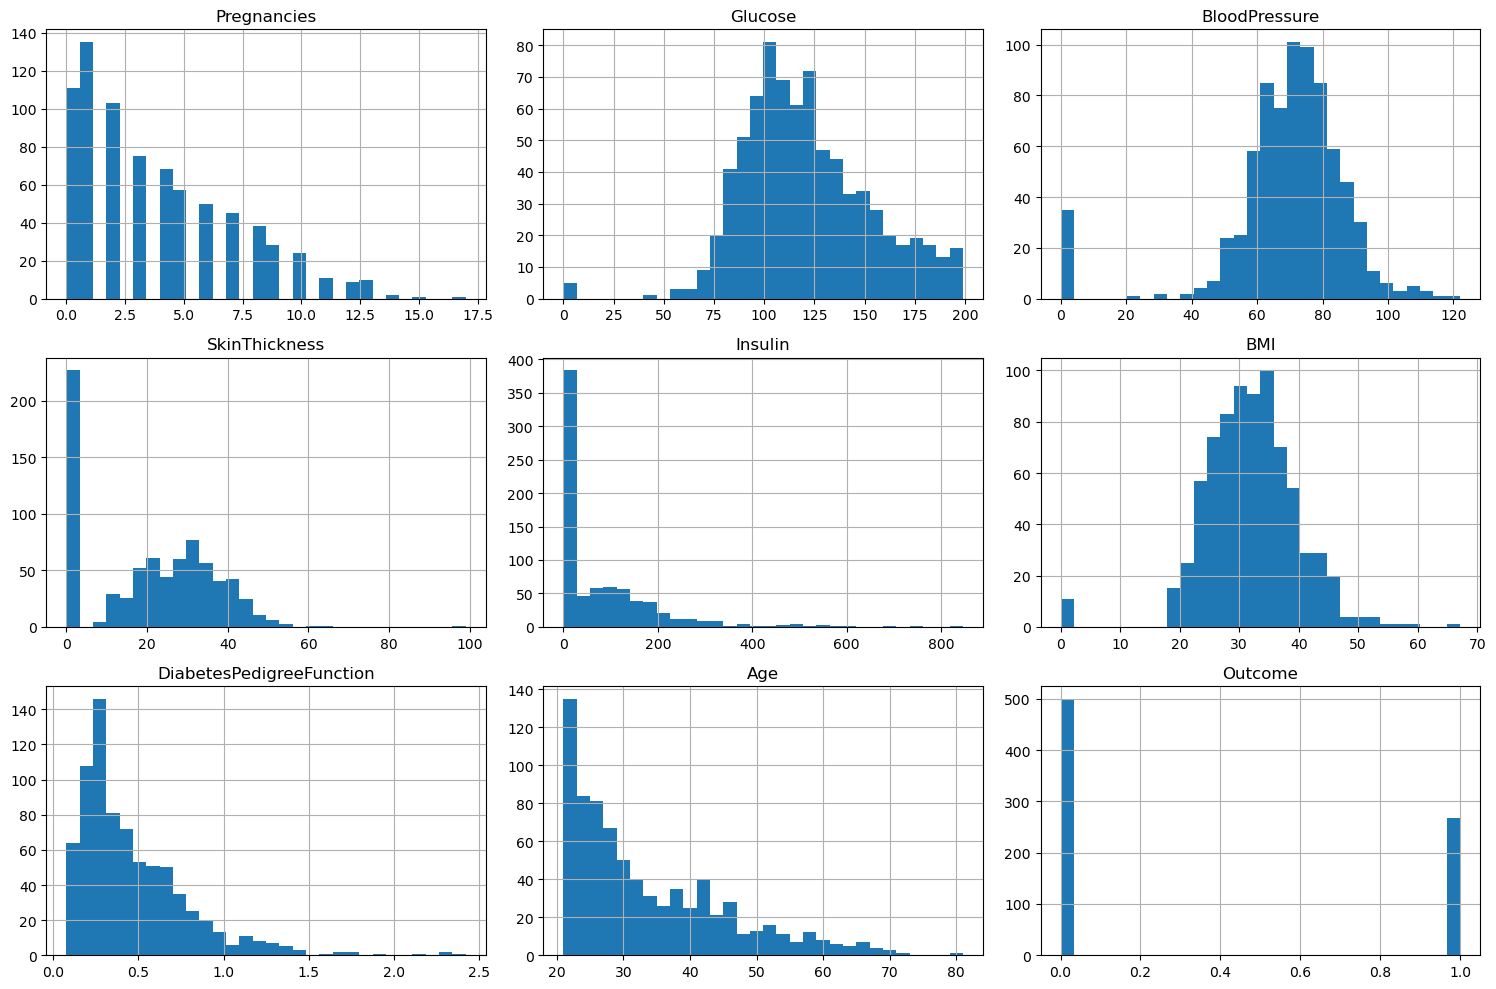

In [80]:
#SECTION 3
#Data visulaization
# Histogram
diabetes_data.hist(bins = 30, figsize=(15,10))
plt.tight_layout()
plt.show()

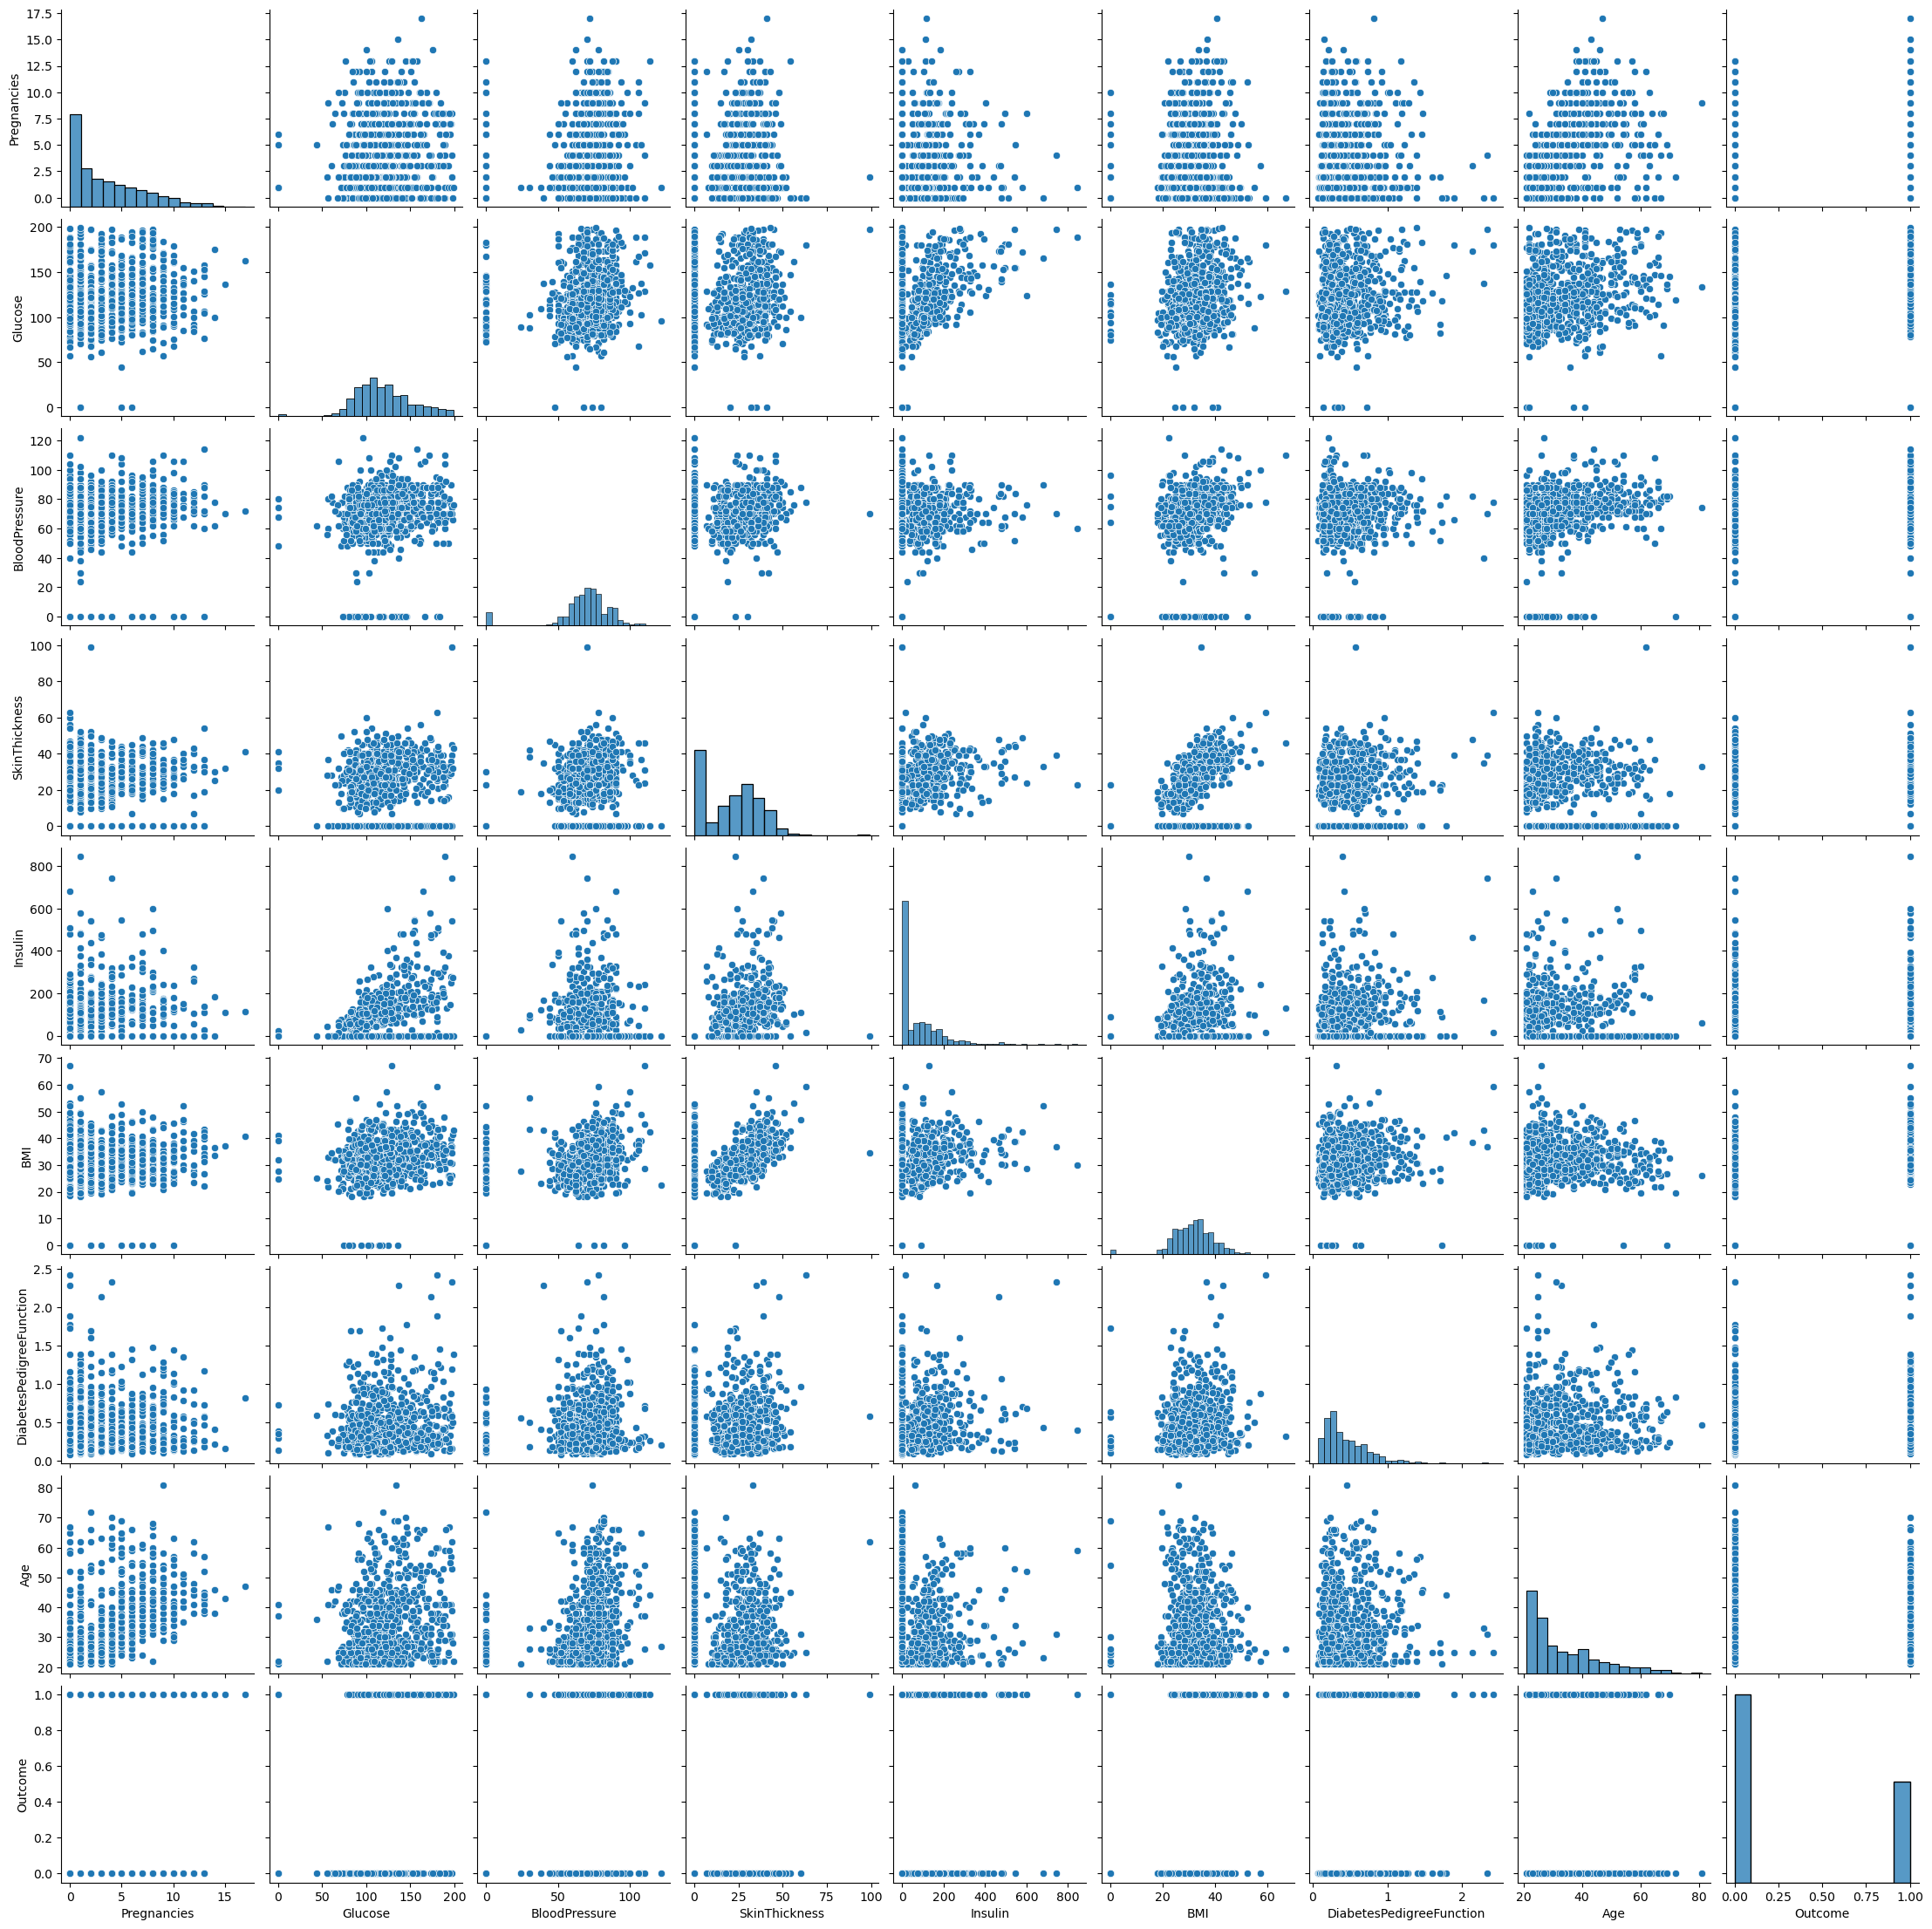

In [81]:
# Creating a pairwise scatter plot matrix
sns.pairplot(diabetes_data)
plt.show()

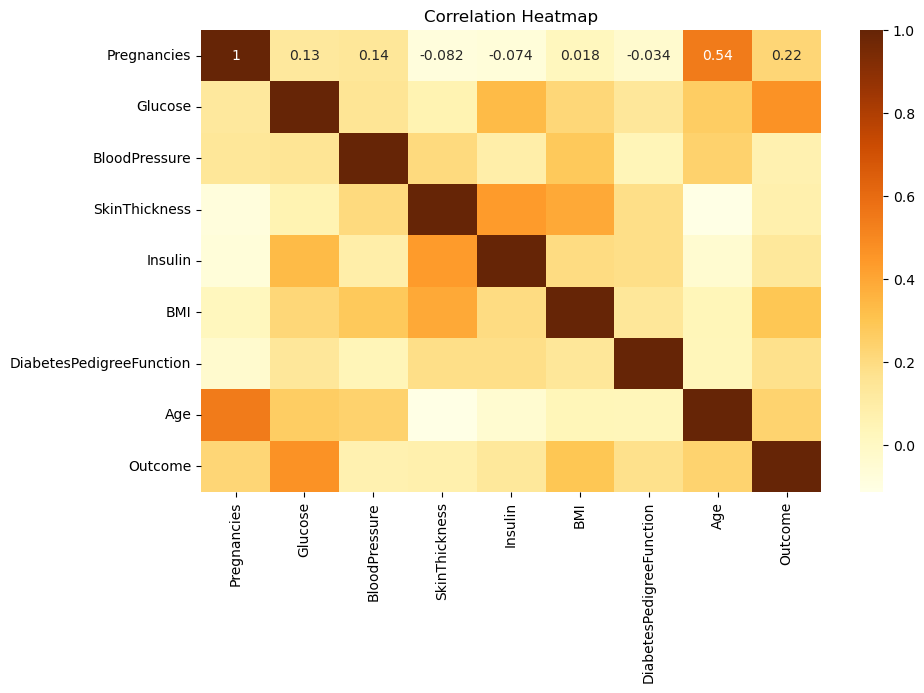

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = diabetes_data.corr()
sns.heatmap(corr, annot=True, cmap='YlOrBr')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#Statistical Analysis
# Summary statistics
summary_stats = diabetes_data.describe()
print(summary_stats)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

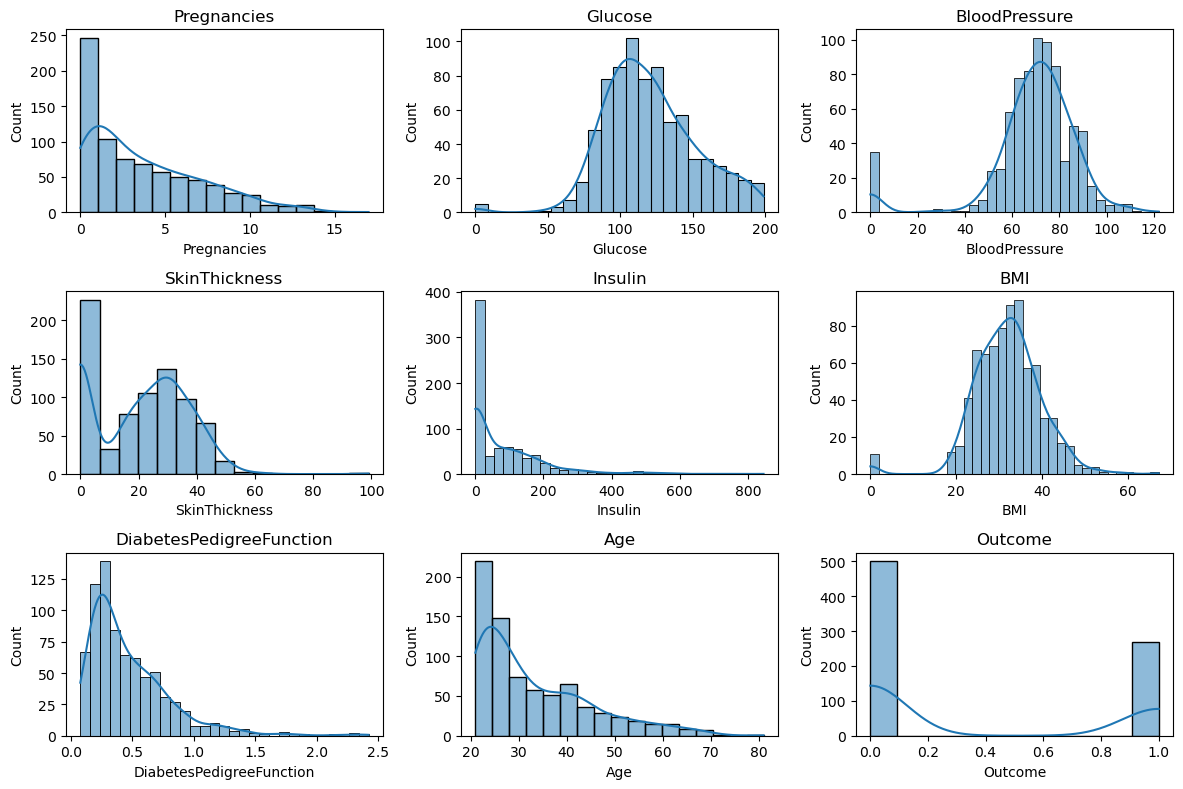

In [16]:
# Visualize distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(diabetes_data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diabetes_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

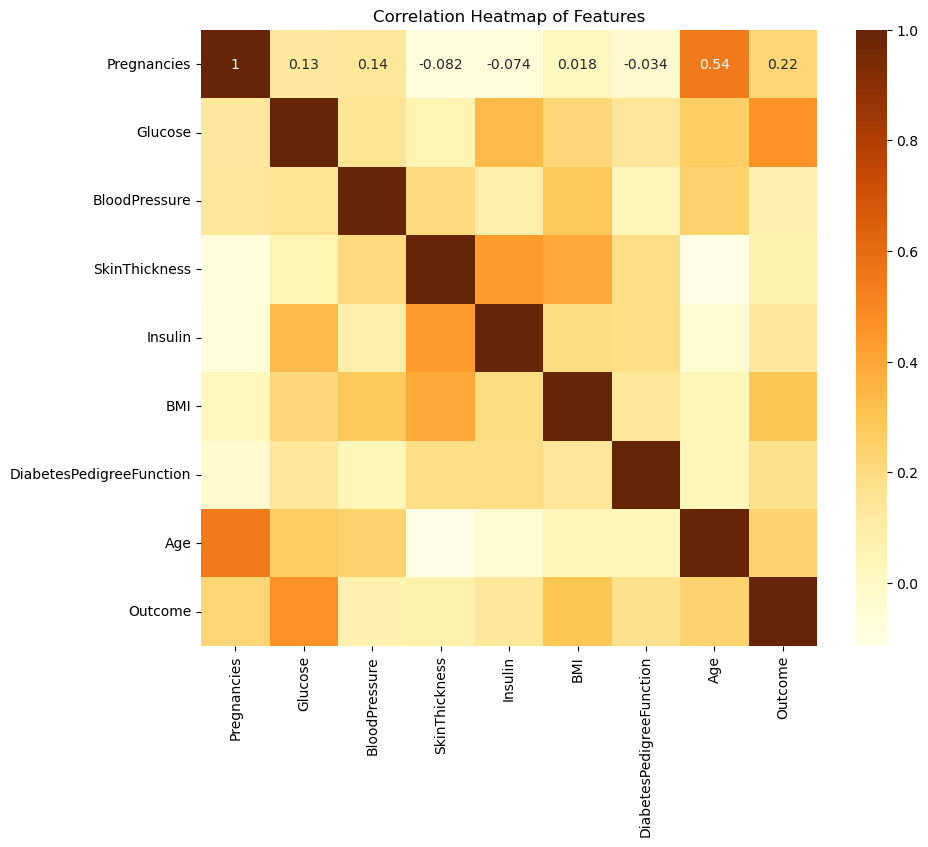

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [17]:
# Calculate correlation matrix
correlation_matrix = diabetes_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

print(correlation_matrix.iloc[:-1, -1].sort_values(ascending=False))

In [18]:
#Section 4: Model Development
#Algorithm Selection
import pandas as pd
from sklearn.model_selection import train_test_split

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Print performance metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [20]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_dt = decision_tree_model.predict(X_test)

# Print performance metrics
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.7272727272727273
Confusion Matrix:
 [[75 24]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.61      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = random_forest_model.predict(X_test)

# Print performance metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.7337662337662337
Confusion Matrix:
 [[80 19]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.63      0.60      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154



In [22]:
#SVM
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = svm_model.predict(X_test)

# Print performance metrics
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM:
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
#SECTION 4:

#Data splitting

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Print performance metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [31]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_dt = decision_tree_model.predict(X_test)

# Print performance metrics
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree:
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[79 20]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        99
           1       0.67      0.73      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = random_forest_model.predict(X_test)

# Print performance metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[79 20]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [33]:
#SVM
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_svm = svm_model.predict(X_test)

# Print performance metrics
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM:
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
#SECTION 4:

#Data splitting

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#Modeltraining and hyper parameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

In [ ]:
param_dist_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

In [ ]:
#Cross-validation

skf = StratifiedKFold(n_splits=5)
cv_scores_lr = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=skf)
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X_train, y_train, cv=skf)

In [54]:
#SECTION 5 
#Performance Metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

In [55]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test)

In [59]:
## Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [60]:
# Precision, Recall, F1-Score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


In [68]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [69]:
# ROC-AUC

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.81267217630854


In [70]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

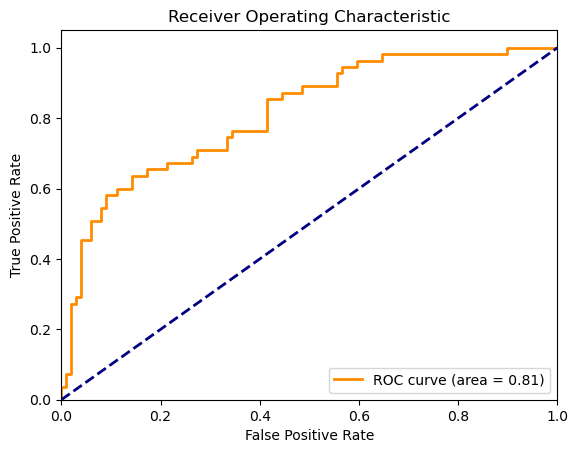

In [71]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
# Evaluate Logistic Regression model
evaluate_model(grid_search_lr.best_estimator_, X_test, y_test)

In [73]:
# Evaluate Random Forest model
evaluate_model(random_search_rf.best_estimator_, X_test, y_test)

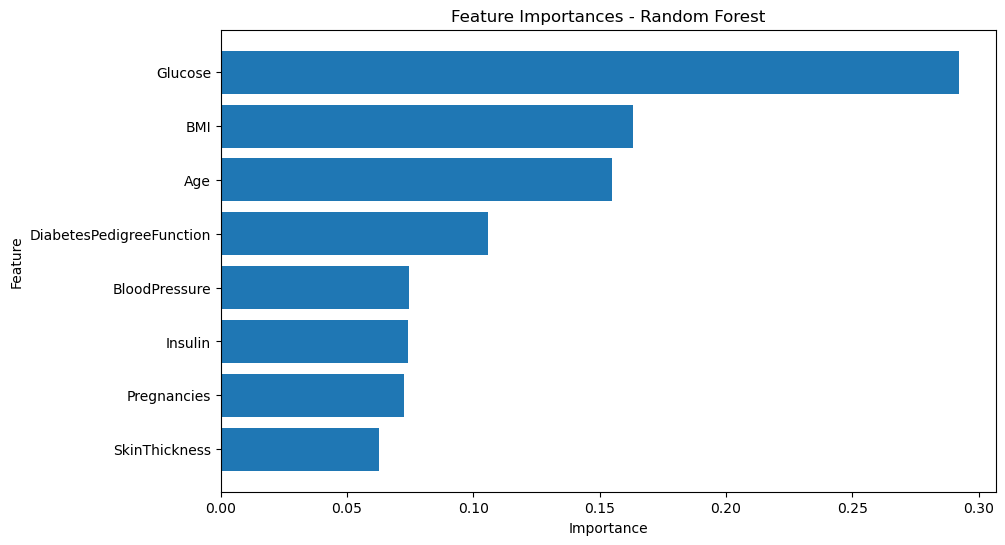

In [74]:
# Feature Importance (Random Forest)
importances = random_search_rf.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [75]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
    --------------------------------------- 10.2/456.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/456.1 kB 653.6 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.1 kB 939.4 kB/s eta 0:00:01
   -------------- ------------------------- 163.8/456.1 kB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/456.1 kB 1.2 MB/s eta 0:00:01
   ------------------------------------ --- 419.8/456.1 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.6 MB/s eta 0:00:00


In [76]:
#SECTION 6
import shap


In [77]:
#Model Interpretation
# SHAP Values (optional, for Random Forest)
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

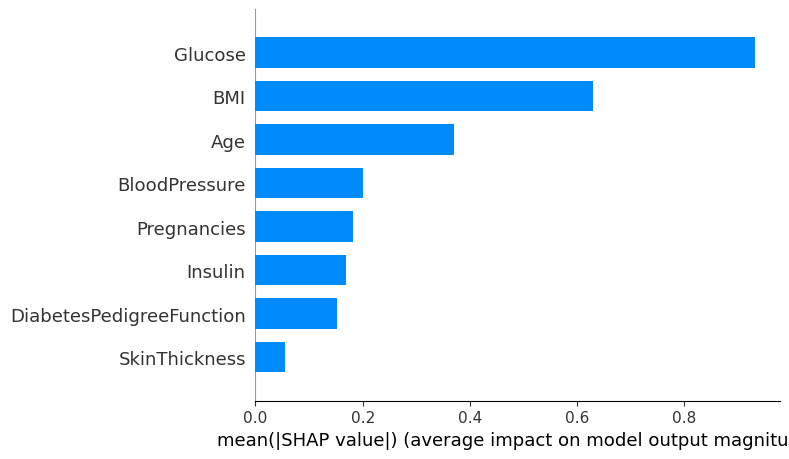

In [78]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

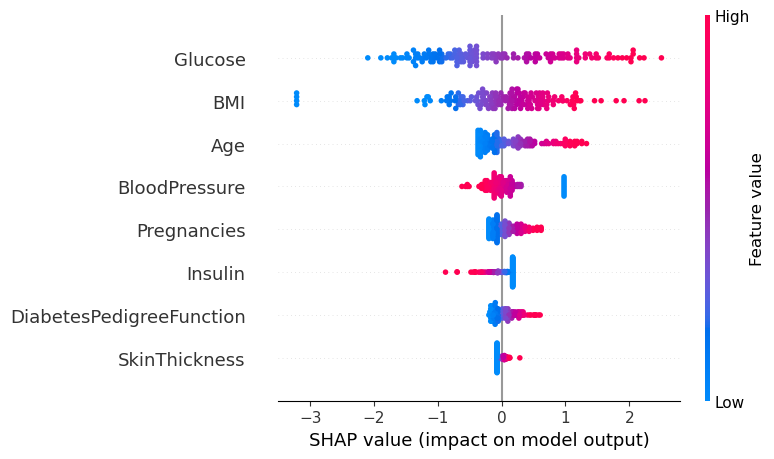

In [79]:
shap.summary_plot(shap_values, X_test)